In [6]:
def CalcRho(S1, S2, PayM, N, beta):
    """
    Exact translation of MATLAB's CalcRho function
    
    Parameters:
    -----------
    S1, S2 : int
        Strategy indices (0-based in Python)
    PayM : numpy array
        Payoff matrix
    N : int
        Population size
    beta : float
        Selection strength
    
    Returns:
    --------
    Rho : float
        Fixation probability
    """
    alpha = np.zeros(N - 1)
    
    for j in range(1, N):  # j: Number of mutants in population (1 to N-1)
        # Payoff mutant
        # MATLAB: pi1=(j-1)/(N-1)*PayM(S1,S1)+(N-j)/(N-1)*PayM(S1,S2)
        pi1 = ((j - 1) / (N - 1)) * PayM[S1, S1] + ((N - j) / (N - 1)) * PayM[S1, S2]
        
        # Payoff resident
        # MATLAB: pi2=j/(N-1)*PayM(S2,S1)+(N-j-1)/(N-1)*PayM(S2,S2)
        pi2 = (j / (N - 1)) * PayM[S2, S1] + ((N - j - 1) / (N - 1)) * PayM[S2, S2]
        
        alpha[j-1] = np.exp(-beta * (pi1 - pi2))
    
    # Calculate fixation probability
    # MATLAB: Rho=1/(1+sum(cumprod(alpha)))
    cumprod_alpha = np.cumprod(alpha)
    Rho = 1 / (1 + np.sum(cumprod_alpha))
    
    return Rho


In [7]:
from scipy.linalg import null_space


def payoff(p, q, qvec, piv1, piv2):
    """
    Exact translation of MATLAB's payoff function
    
    Parameters:
    -----------
    p, q : numpy arrays (length 8)
        Strategy vectors
    qvec : numpy array (length 6)
        Transition probabilities [q12, q11, q10, q02, q01, q00]
    piv1, piv2 : numpy arrays (length 8)
        Payoff vectors for players 1 and 2
    
    Returns:
    --------
    pi1, pi2 : float
        Expected payoffs
    cop1, cop2 : float
        Cooperation frequencies
    s1 : float
        Frequency in state 1
    """
    eps = 1e-3  # Error rate for implementation errors
    
    # Adding errors to the players' strategies
    p = p * (1 - eps) + (1 - p) * eps
    q = q * (1 - eps) + (1 - q) * eps
    
    # Constructing the transition matrix M (8x8)
    # This exactly follows the MATLAB matrix construction
    M = np.array([
        # Row 1
        [qvec[0]*p[0]*q[0], qvec[0]*p[0]*(1-q[0]), qvec[0]*(1-p[0])*q[0], qvec[0]*(1-p[0])*(1-q[0]), 
         (1-qvec[0])*p[4]*q[4], (1-qvec[0])*p[4]*(1-q[4]), (1-qvec[0])*(1-p[4])*q[4], (1-qvec[0])*(1-p[4])*(1-q[4])],
        
        # Row 2
        [qvec[1]*p[1]*q[2], qvec[1]*p[1]*(1-q[2]), qvec[1]*(1-p[1])*q[2], qvec[1]*(1-p[1])*(1-q[2]), 
         (1-qvec[1])*p[5]*q[6], (1-qvec[1])*p[5]*(1-q[6]), (1-qvec[1])*(1-p[5])*q[6], (1-qvec[1])*(1-p[5])*(1-q[6])],
        
        # Row 3
        [qvec[1]*p[2]*q[1], qvec[1]*p[2]*(1-q[1]), qvec[1]*(1-p[2])*q[1], qvec[1]*(1-p[2])*(1-q[1]), 
         (1-qvec[1])*p[6]*q[5], (1-qvec[1])*p[6]*(1-q[5]), (1-qvec[1])*(1-p[6])*q[5], (1-qvec[1])*(1-p[6])*(1-q[5])],
        
        # Row 4
        [qvec[2]*p[3]*q[3], qvec[2]*p[3]*(1-q[3]), qvec[2]*(1-p[3])*q[3], qvec[2]*(1-p[3])*(1-q[3]), 
         (1-qvec[2])*p[7]*q[7], (1-qvec[2])*p[7]*(1-q[7]), (1-qvec[2])*(1-p[7])*q[7], (1-qvec[2])*(1-p[7])*(1-q[7])],
        
        # Row 5
        [qvec[3]*p[0]*q[0], qvec[3]*p[0]*(1-q[0]), qvec[3]*(1-p[0])*q[0], qvec[3]*(1-p[0])*(1-q[0]), 
         (1-qvec[3])*p[4]*q[4], (1-qvec[3])*p[4]*(1-q[4]), (1-qvec[3])*(1-p[4])*q[4], (1-qvec[3])*(1-p[4])*(1-q[4])],
        
        # Row 6
        [qvec[4]*p[1]*q[2], qvec[4]*p[1]*(1-q[2]), qvec[4]*(1-p[1])*q[2], qvec[4]*(1-p[1])*(1-q[2]), 
         (1-qvec[4])*p[5]*q[6], (1-qvec[4])*p[5]*(1-q[6]), (1-qvec[4])*(1-p[5])*q[6], (1-qvec[4])*(1-p[5])*(1-q[6])],
        
        # Row 7
        [qvec[4]*p[2]*q[1], qvec[4]*p[2]*(1-q[1]), qvec[4]*(1-p[2])*q[1], qvec[4]*(1-p[2])*(1-q[1]), 
         (1-qvec[4])*p[6]*q[5], (1-qvec[4])*p[6]*(1-q[5]), (1-qvec[4])*(1-p[6])*q[5], (1-qvec[4])*(1-p[6])*(1-q[5])],
        
        # Row 8
        [qvec[5]*p[3]*q[3], qvec[5]*p[3]*(1-q[3]), qvec[5]*(1-p[3])*q[3], qvec[5]*(1-p[3])*(1-q[3]), 
         (1-qvec[5])*p[7]*q[7], (1-qvec[5])*p[7]*(1-q[7]), (1-qvec[5])*(1-p[7])*q[7], (1-qvec[5])*(1-p[7])*(1-q[7])]
    ])
    
    # Calculate stationary distribution
    # MATLAB: v=null(M'-eye(8)); v=v/sum(v);
    try:
        v = null_space(M.T - np.eye(8))
        v = v / np.sum(v)
        v = v.flatten()
    except:
        # Fallback: use power iteration if null_space fails
        v = np.ones(8) / 8
        for _ in range(1000):
            v_new = v @ M
            if np.allclose(v_new, v, atol=1e-12):
                break
            v = v_new
    
    # Calculate expected payoffs
    # MATLAB: pi1=piv1*v; pi2=piv2*v;
    pi1 = np.dot(piv1, v)
    pi2 = np.dot(piv2, v)
    
    # Calculate cooperation frequencies
    # MATLAB: cop1=v(1)+v(2)+v(5)+v(6); cop2=v(1)+v(3)+v(5)+v(7);
    cop1 = v[0] + v[1] + v[4] + v[5]
    cop2 = v[0] + v[2] + v[4] + v[6]
    
    # Calculate frequency in state 1
    # MATLAB: s1=sum(v(1:4));
    s1 = np.sum(v[0:4])
    
    return pi1, pi2, cop1, cop2, s1


In [8]:
def CalcSMEquilibrium(qvec, piRound, beta):
    """
    Exact translation of MATLAB's CalcSMEquilibrium function
    
    Parameters:
    -----------
    qvec : numpy array (length 6)
        [q12, q11, q10, q02, q01, q00] transition probabilities
    piRound : numpy array (length 8)
        [u1CC, u1CD, u1DC, u1DD, u2CC, u2CD, u2DC, u2DD] payoffs
    beta : float
        Selection strength
    
    Returns:
    --------
    coop : float
        Average cooperation rate
    pay : float
        Average payoff
    s1 : float
        Frequency in state 1
    freq : numpy array
        Frequencies of all memory-1 strategies
    Str : numpy array
        All possible strategies (5-bit)
    """
    # Setting up all objects
    N = 100  # Population size
    
    # Payoff vectors
    pv1 = piRound.copy()  # payoff vector from perspective of player 1
    
    # Creating payoff vector from perspective of player 2
    # MATLAB: pv2(2:3)=piRound(3:-1:2); pv2(6:7)=piRound(7:-1:6)
    pv2 = piRound.copy()
    pv2[1:3] = piRound[2:0:-1]  # Swap positions 1 and 2
    pv2[5:7] = piRound[6:4:-1]  # Swap positions 5 and 6
    
    # List of all memory-1 strategies (5-bit binary)
    n_strategies = 2**5
    Str = np.zeros((n_strategies, 5), dtype=int)
    
    for i in range(n_strategies):
        bin_str = format(i, f'0{5}b')
        Str[i] = list(map(int, bin_str))
    
    # Convert 5-dim strategy vectors to 8-dim vectors using Proposition 1
    # MATLAB: Str8=[Str(:,1)'; Str(:,3)'; Str(:,4)'; Str(:,5)'; Str(:,2)'; Str(:,3)'; Str(:,4)'; Str(:,5)']'
    Str8 = np.zeros((n_strategies, 8))
    Str8[:, 0] = Str[:, 0]  # pC|CC
    Str8[:, 1] = Str[:, 2]  # pC|CD
    Str8[:, 2] = Str[:, 3]  # pC|DC
    Str8[:, 3] = Str[:, 4]  # pC|DD
    Str8[:, 4] = Str[:, 1]  # pD|CC
    Str8[:, 5] = Str[:, 2]  # pD|CD
    Str8[:, 6] = Str[:, 3]  # pD|DC
    Str8[:, 7] = Str[:, 4]  # pD|DD
    
    # Initialize matrices
    PayM = np.zeros((n_strategies, n_strategies))
    C = np.zeros((n_strategies, n_strategies))  # Cooperation matrix
    S1_mat = np.zeros((n_strategies, n_strategies))  # State 1 frequency matrix
    
    # Calculate all pairwise quantities
    print("Calculating pairwise payoffs...")
    for i in range(n_strategies):
        for j in range(i, n_strategies):
            pi1, pi2, cop1, cop2, s1_val = payoff(Str8[i], Str8[j], qvec, pv1, pv2)
            
            PayM[i, j] = pi1
            PayM[j, i] = pi2
            
            C[i, j] = cop1
            C[j, i] = cop2
            
            S1_mat[i, j] = s1_val
            S1_mat[j, i] = s1_val  # Assuming symmetric for state frequency
    
    # Setting up the transition matrix according to Fudenberg and Imhof
    T = np.zeros((n_strategies, n_strategies))
    
    print("Calculating transition matrix...")
    for i in range(n_strategies):
        # Calculate off-diagonal entries
        for j in range(n_strategies):
            if i != j:
                # Off-diagonal: (1/(n_strategies-1)) * fixation probability
                T[i, j] = (1 / (n_strategies - 1)) * CalcRho(j, i, PayM, N, beta)
        
        # Diagonal: 1 - sum of off-diagonal entries
        # MATLAB: T(i,i)=0; T(i,i)=1-sum(T(i,:))
        row_sum = np.sum(T[i, :])
        T[i, i] = 1 - row_sum
    
    # Ensure rows sum to 1 (numerical stability)
    row_sums = T.sum(axis=1)
    if not np.allclose(row_sums, 1.0, atol=1e-10):
        print(f"Normalizing transition matrix rows...")
        T = T / row_sums[:, np.newaxis]
    
    # Calculate invariant distribution (stationary distribution)
    # MATLAB: v=null(T'-eye(2^5)); freq=v'/sum(v)
    print("Calculating stationary distribution...")
    try:
        v = null_space(T.T - np.eye(n_strategies))
        if v.size == 0:
            raise ValueError("Null space is empty")
        
        v = v / np.sum(v)
        v = v.flatten()
        freq = v
    except Exception as e:
        print(f"Using power iteration fallback: {e}")
        # Fallback: use power iteration
        freq = np.ones(n_strategies) / n_strategies
        for _ in range(10000):
            freq_new = freq @ T
            if np.allclose(freq_new, freq, atol=1e-15):
                break
            freq = freq_new
    
    # Calculate equilibrium quantities
    # MATLAB: coop=freq*diag(C)
    coop = np.sum(freq * np.diag(C))
    
    # MATLAB: pay=freq*diag(PayM)
    pay = np.sum(freq * np.diag(PayM))
    
    # MATLAB: s1=freq*diag(S1)
    s1 = np.sum(freq * np.diag(S1_mat))
    
    return coop, pay, s1, freq, Str

Calculating Figure 3a data...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Calculating transition matrix...
Calculating stationary distribution...
Calculating pairwise payoffs...
Ca

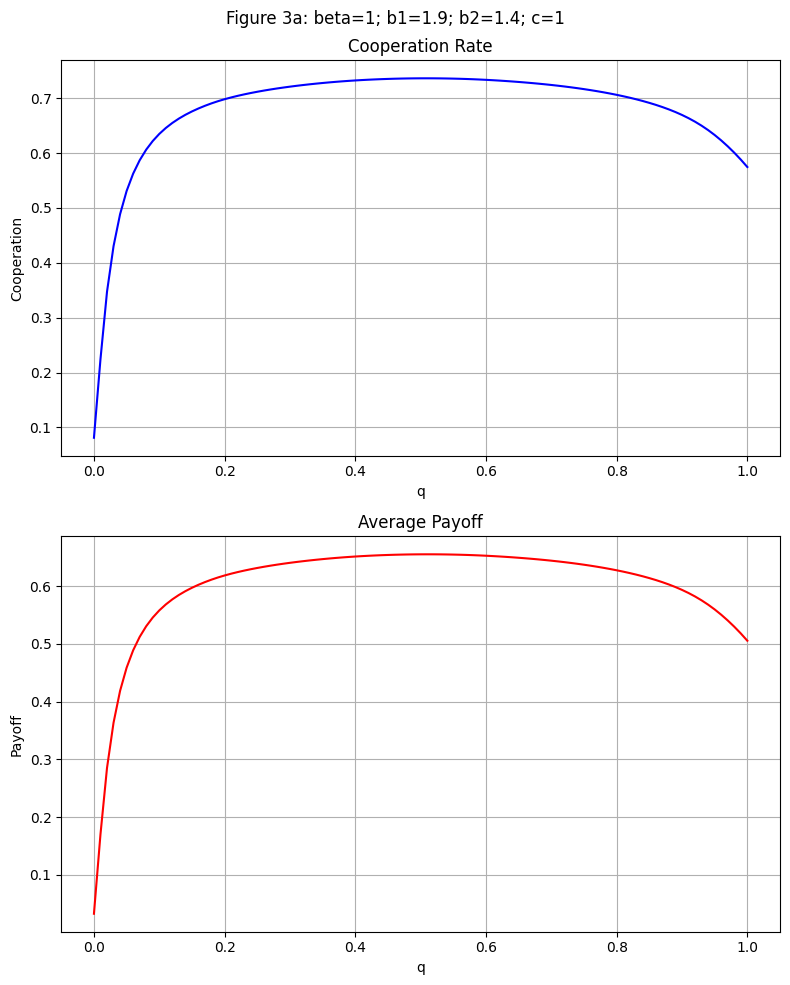


Parameters: beta=1; b1=1.9; b2=1.4; c=1
Number of q values: 101
Cooperation range: 0.081 to 0.736
Payoff range: 0.032 to 0.655


In [9]:
import numpy as np
import matplotlib.pyplot as plt

def GetEvolData():
    """
    Exact Python translation of MATLAB's GetEvolData for Figure 3a
    """
    # Parameters for Figure 3a
    beta = 1
    b1 = 1.9
    b2 = 1.4
    c = 1
    qPoss = np.arange(0, 1.01, 0.01)  # 0:0.01:1
    n = len(qPoss)
    
    coop = np.zeros(n)
    pay = np.zeros(n)
    
    # Payoff vector
    piRound = np.array([b1 - c, -c, b1, 0, b2 - c, -c, b2, 0])
    Data = f"beta={beta}; b1={b1}; b2={b2}; c={c}"
    
    # Running the calculations
    for i in range(n):
        q = qPoss[i]
        qvec = np.array([1.0, 0.0, 0.0, q, 0.0, 0.0])
        
        # Call CalcSMEquilibrium (we need to implement this function too)
        coop[i], pay[i], _, _, _ = CalcSMEquilibrium(qvec, piRound, beta)
    
    return qPoss, coop, pay, Data


# Now here's the minimal plotting function
def plot_results(qPoss, coop, pay, Data):
    """
    Simple plot function to visualize Figure 3a results
    """
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(8, 10))
    
    # Plot cooperation
    ax1.plot(qPoss, coop, 'b-')
    ax1.set_xlabel('q')
    ax1.set_ylabel('Cooperation')
    ax1.set_title('Cooperation Rate')
    ax1.grid(True)
    
    # Plot payoff
    ax2.plot(qPoss, pay, 'r-')
    ax2.set_xlabel('q')
    ax2.set_ylabel('Payoff')
    ax2.set_title('Average Payoff')
    ax2.grid(True)
    
    # Add parameter text
    plt.suptitle(f'Figure 3a: {Data}')
    plt.tight_layout()
    plt.show()


# And here's a minimal test to run it
if __name__ == "__main__":
    # Run the calculation
    print("Calculating Figure 3a data...")
    qPoss, coop, pay, Data = GetEvolData()
    
    # Plot results
    plot_results(qPoss, coop, pay, Data)
    
    # Print a simple summary (optional)
    print(f"\nParameters: {Data}")
    print(f"Number of q values: {len(qPoss)}")
    print(f"Cooperation range: {coop.min():.3f} to {coop.max():.3f}")
    print(f"Payoff range: {pay.min():.3f} to {pay.max():.3f}")